# Session 5 | Image Classification using `scikit-learn`

In [18]:
import os
import sys
sys.path.append("..")
import inspect

# Import teaching utils
import numpy as np
import utils.classifier_utils as clf_util

# Import sklearn metrics
from sklearn import metrics
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
X, y = fetch_openml('mnist_784', 
                    version=1, 
                    parser="auto",
                    return_X_y=True)

In [3]:
sorted(set(y))

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [4]:
X = np.array(X)
y = np.array(y)

In [5]:
classes = sorted(set(y))
nclasses = len(classes)

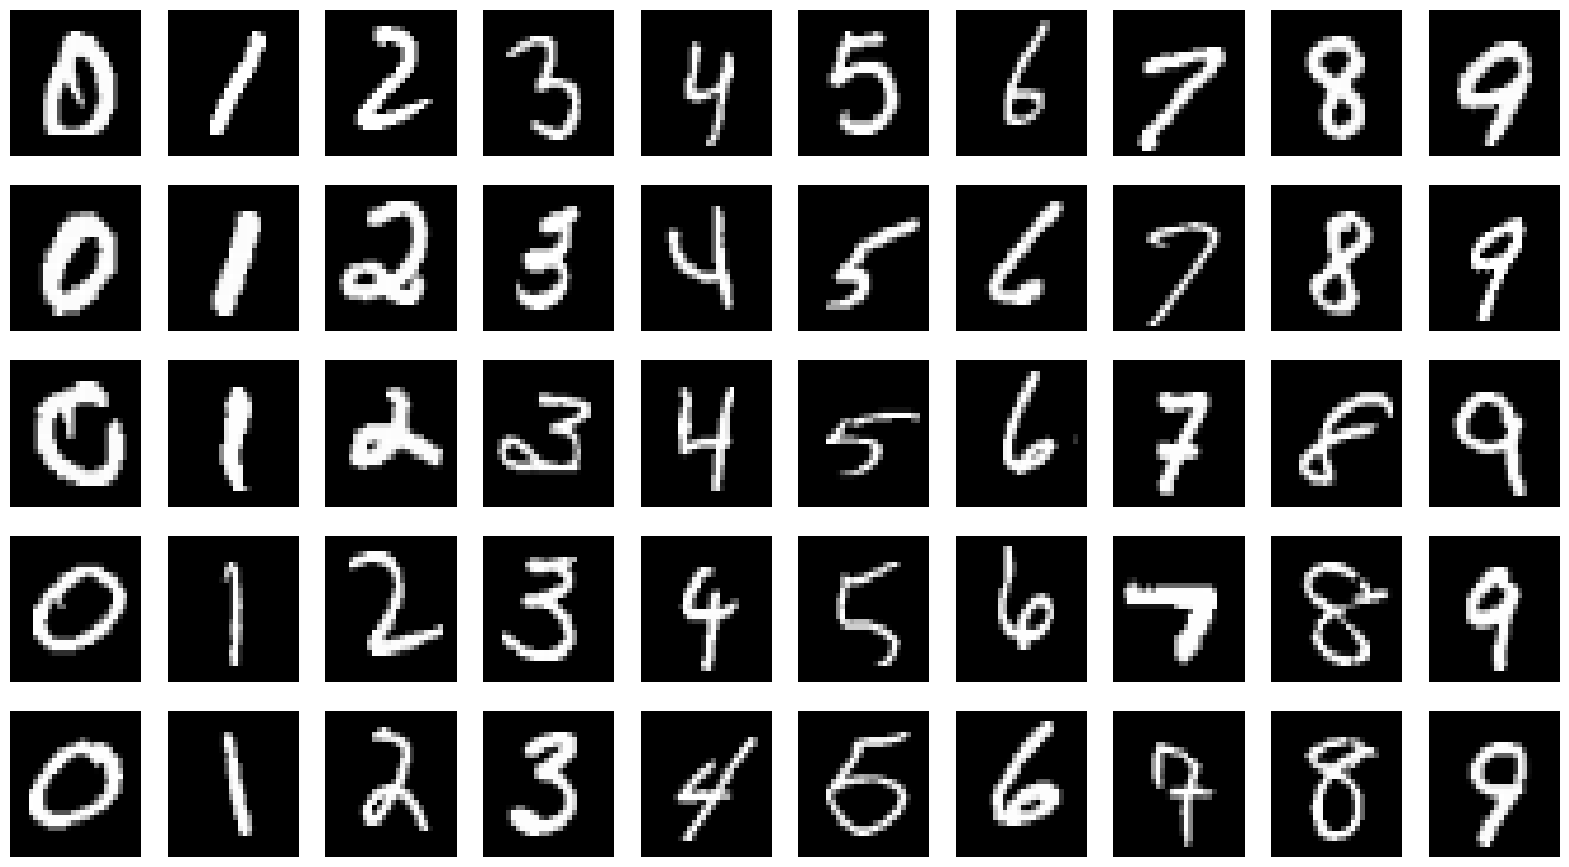

In [21]:
clf_util.plot_sample(X, y, classes, 5)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=42,
                                                    train_size=7500, 
                                                    test_size=2500)

In [24]:
#scaling the features
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [26]:
clf = LogisticRegression(tol=0.1, 
                         solver='saga',
                         multi_class='multinomial').fit(X_train_scaled, y_train)

In [27]:
#to check the shape of the coefficient (weights) matrix
clf.coef_.shape

(10, 784)

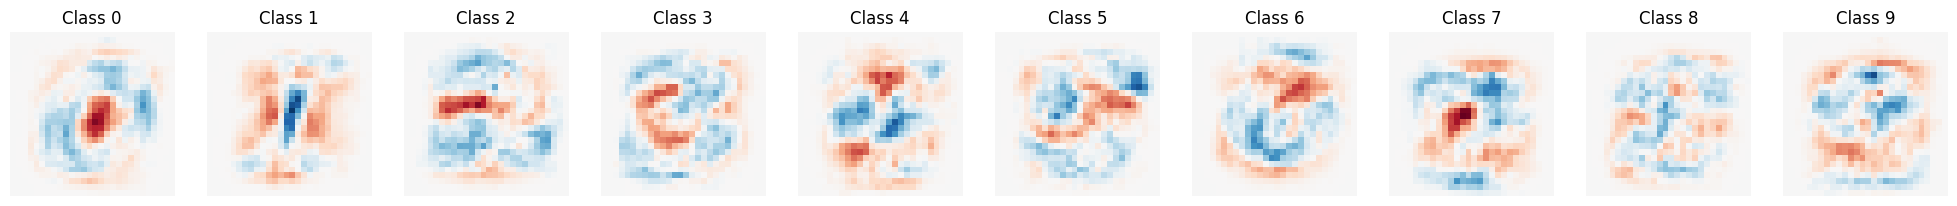

In [28]:
clf_util.plot_coefs(clf.coef_, nclasses)

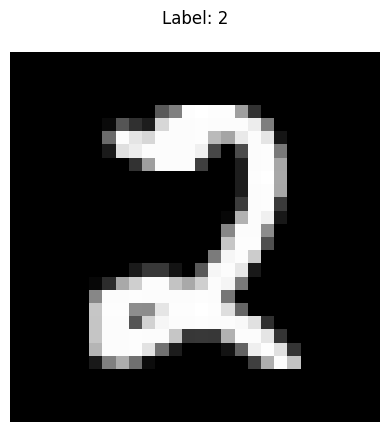

In [29]:
clf_util.plot_individual(X_test_scaled, 
                         y_test, 
                         50)